# GSAS-II: Phases

In [1]:
import G2script as G2
import matplotlib.pyplot as plt

setting up GSASIIscriptable from /users/edgar1993a/work/g2home
GSAS-II binary directory: /users/edgar1993a/work/g2home/bindist
7 values read from config file /users/edgar1993a/work/g2home/config.py


In [2]:
PROJECT_NAME = 'gsas_phase.gpx'
gpx = G2.G2Project(newgpx=PROJECT_NAME)
gpx.save()

gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_phase.gpx


#### For the moment, the project is emtpy and does not contain any phase

In [3]:
gpx.phases()

[]

#### We will start by adding one phase to the project

In [4]:
zno = gpx.add_phase(
    phasefile='ZnO.cif',
    phasename='zno',
    histograms=[],
)

/home/edgar1993a/work/pyobjcryst/ZnO.cif read by Reader CIF
gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_phase.gpx


#### The cif file contains a complete phase, with cell parameters and atoms

#### We can retrieve the cell parameters of the phase as a dict

In [5]:
zno.get_cell()

{'length_a': 3.2495,
 'length_b': 3.2495,
 'length_c': 5.2069,
 'angle_alpha': 90.0,
 'angle_beta': 90.0,
 'angle_gamma': 120.0,
 'volume': 47.61490819420314}

#### In a phase, we can check the composition

In [6]:
zno.composition

{'Zn': 2.0, 'O': 2.0}

#### We can retrieve the atoms of the cell

In [7]:
zno.atoms()

#### At this moment, there is not a histogram associated to the phase, so any method related to HAP is useless

In [8]:
zno.histograms()

[]

In [9]:
# zno.getHAPvalues()

#### The Phase is an object with tags and information but it does not contain any data points, 

#### In GSASII, the data points are stored only in histograms

#### Therefore, in order to simulate the diffractogram points from a phase, we have to create an histogram, which is is a G2PwdrData object

In [10]:
hist_sim = gpx.add_simulated_powder_histogram(
    histname='hist_simulation_zno',
    iparams='cuka.instprm',
    Tmin=0,
    Tmax=100,
    Tstep=0.05,
    phases=[zno],
)

Simulating 2001 points from 0 to 100 degrees 2theta
Instrument parameters read: /home/edgar1993a/work/pyobjcryst/cuka.instprm (G2 fmt) bank 1


In [11]:
type(hist_sim)

GSASIIscriptable.G2PwdrData

#### We just created an histogram measured using the instrumental parameters in the .instprm file, with the phase, but we still need to simulate the data

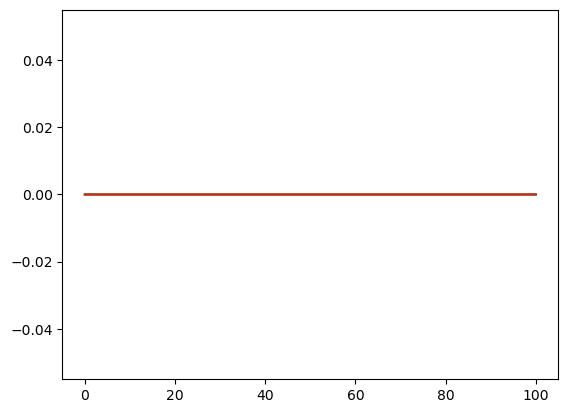

In [12]:
hist_sim.plot()

### The refinement is performed at the project level

In [13]:
gpx.do_refinements()

gpx file saved as /home/edgar1993a/work/pyobjcryst/gsas_phase.gpx
 Hessian Levenberg-Marquardt SVD refinement on 1 variables:
initial chi^2 10064 with 2001 obs.
Read from file:/home/edgar1993a/work/pyobjcryst/gsas_phase.bak0.gpx
Save to file  :/home/edgar1993a/work/pyobjcryst/gsas_phase.gpx
GPX file save successful
 Refinement results are in file: /home/edgar1993a/work/pyobjcryst/gsas_phase.lst
 ***** Refinement successful *****


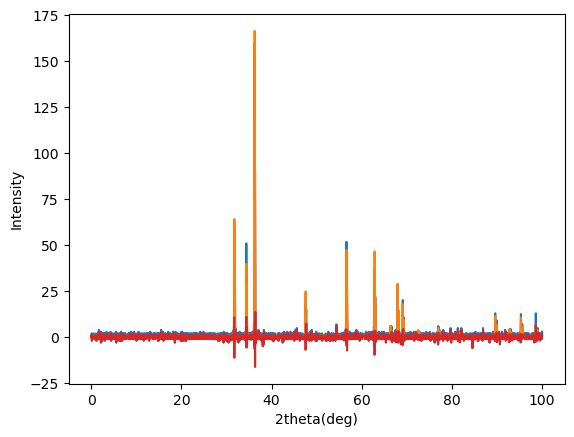

In [14]:
hist_sim.plot()
plt.xlabel('2theta(deg)')
plt.ylabel('Intensity')
plt.show()

#### The simulated data, without noise, can be retrieved

In [15]:
tth = hist_sim.getdata('X')
intensity_obs = hist_sim.getdata('Yobs')
intensity_calc = hist_sim.getdata('Ycalc')

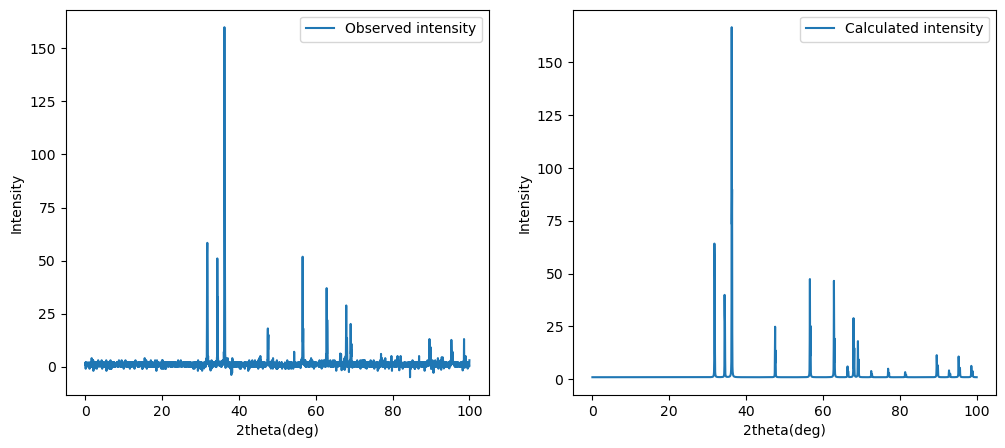

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
INTS = [intensity_obs, intensity_calc]
LABELS = ['Observed intensity', 'Calculated intensity']
for ind in range(len(INTS)):
    axes[ind].plot(tth, INTS[ind], label=LABELS[ind])
    axes[ind].set_xlabel('2theta(deg)')
    axes[ind].set_ylabel('Intensity')
    axes[ind].legend()